<h1>Problem 1</h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv('Lab2_Data/DF1')

print(data)

x0 = data['0']
x1 = data['1']
x2 = data['2']
x3 = data['3']

      Unnamed: 0         0         1         2         3
0              0  1.038502  0.899865  0.835053 -0.971528
1              1  0.320455 -0.647459  0.149079  0.352593
2              2  0.055480  2.234771  0.271672 -2.108739
3              3 -0.007260 -0.524299 -0.126550  0.670827
4              4 -1.237390 -1.377017 -1.049932  1.342079
...          ...       ...       ...       ...       ...
9995        9995 -0.632309 -0.145873 -0.797517  0.436184
9996        9996  0.679417 -0.530216  0.526470  0.439397
9997        9997  0.890697 -2.210855  1.072751  2.285372
9998        9998  0.475293  0.490971  0.536909 -0.195772
9999        9999  1.207406  0.819239  1.230797 -0.752397

[10000 rows x 5 columns]


Scatterplots using Pandas:

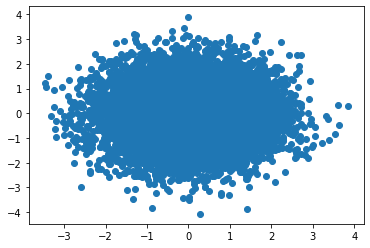

In [4]:
plt.scatter(x0, x1)

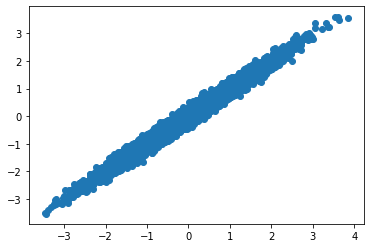

In [5]:
plt.scatter(x0, x2)

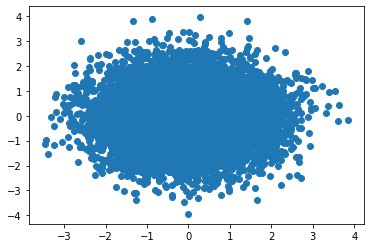

In [6]:
plt.scatter(x0, x3)

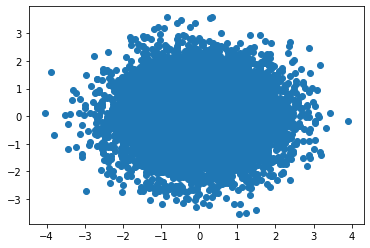

In [7]:
plt.scatter(x1, x2)

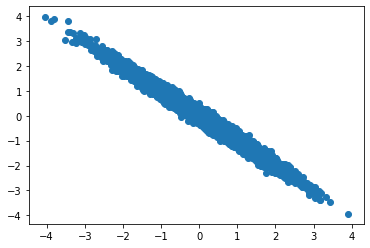

In [8]:
plt.scatter(x1, x3)

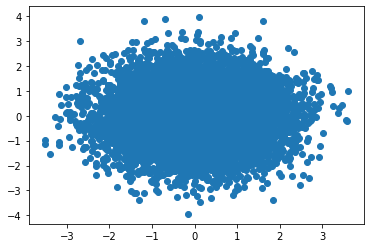

In [9]:
plt.scatter(x2, x3)

Scatterplots using Seaborn:

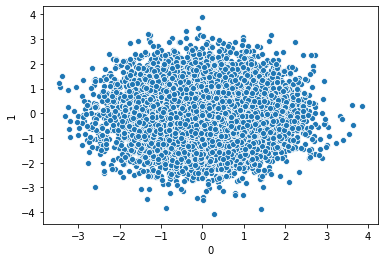

In [10]:
sns.scatterplot(x="0", y="1", data=data)

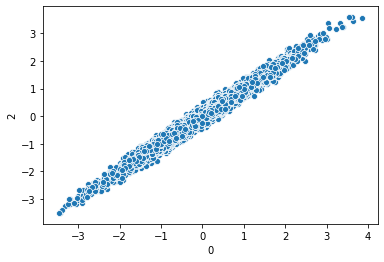

In [12]:
sns.scatterplot(x="0", y="2", data=data)

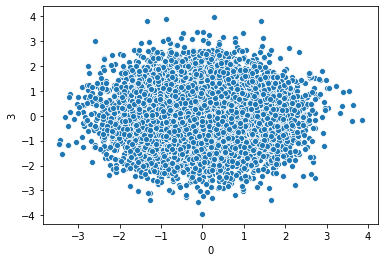

In [13]:
sns.scatterplot(x="0", y="3", data=data)

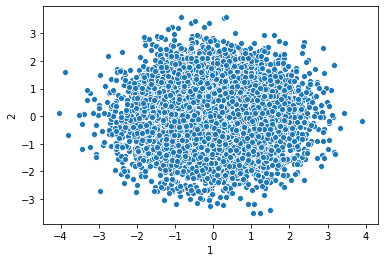

In [14]:
sns.scatterplot(x="1", y="2", data=data)

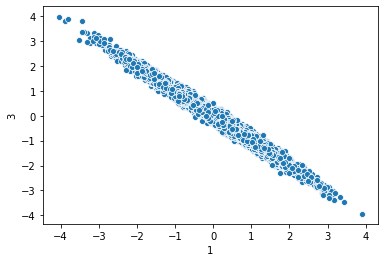

In [15]:
sns.scatterplot(x="1", y="3", data=data)

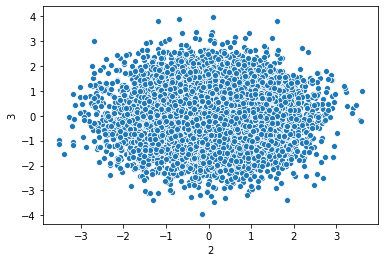

In [16]:
sns.scatterplot(x="2", y="3", data=data)

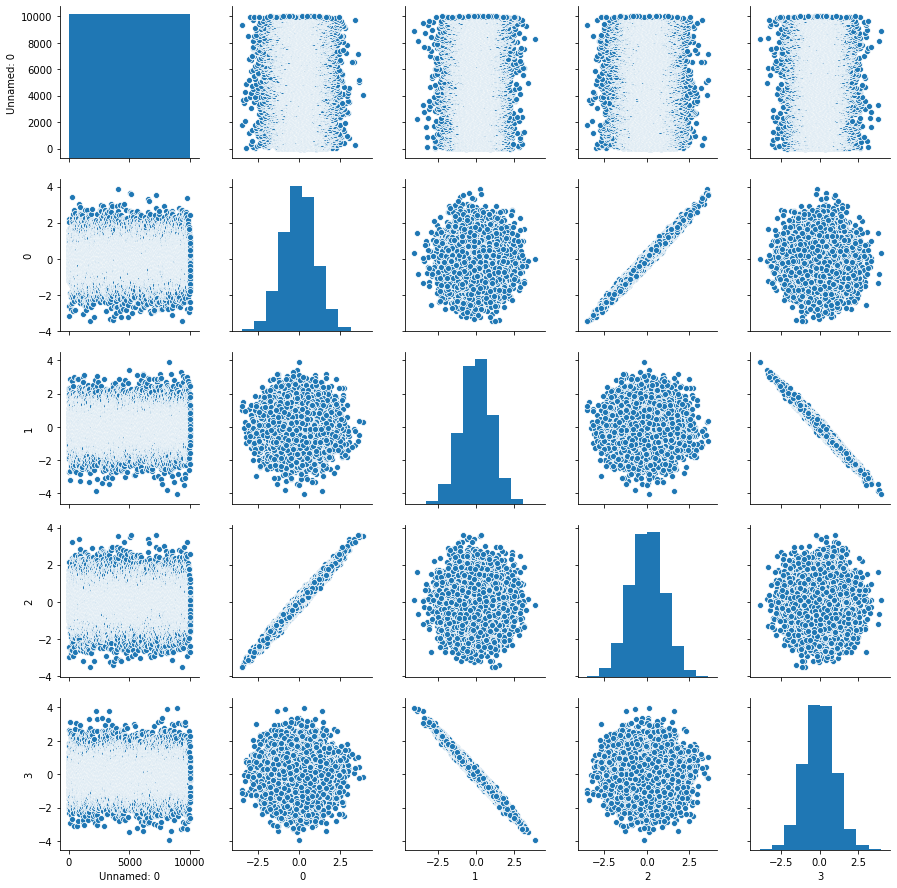

In [17]:
sns.pairplot(data)

From the Pandas and Seaborn scatterplots we can see:
    - Column 0 and column 2 are positively correlated 
    - Column 1 and column 3 are negatively correlated

Covariance Matrix:
[[var(x0) cov(x0, x1) cov(x0, x2) cov(x0, x3)],
 [cov(x1, x0) var(x1) cov(x1, x2) cov(x1, x3)],
 [cov(x2, x0) cov(x2, x1) var(x2) cov(x2, x3)],
 [cov(x3, x0) cov(x3, x1) cov(x3, x2) var(x3)]]
 
 Note that the elements on the main diagonal are the covariances of each variable with itself which is simply the variance of each variable (i.e. cov(x0, x0) = var(x0))

In [18]:
newData = data.loc[:, '0':'3']
covMatrix = np.cov(np.transpose(newData))
print("Covariance Matrix:\n", covMatrix)

Covariance Matrix:
 [[ 1.00155793 -0.00401176  0.99162409  0.00412485]
 [-0.00401176  1.00537841 -0.00409877 -0.99545662]
 [ 0.99162409 -0.00409877  1.00158867  0.00408108]
 [ 0.00412485 -0.99545662  0.00408108  1.00516828]]


As we can see from the matrix, column 0 and column 2 are strongly correlated with a value of 0.99162409 and it is a positive number, showing that they are positively correlated. Likewise, column 1 and 3 have a covariance of -0.9954662 which shows that they are strongly negatively correlated. The other values, other than the main diagonal, show that the other combinations of columns are not correlated with one another as the values are very small.

In [31]:
mean = [0, 0, 0]
cov = [[1, 0, 0],
      [ 0, 1, 1],
      [ 0, 1, 1]]
n = 5
gaussian = np.random.multivariate_normal(mean, cov, n)

In [32]:
np.cov(np.transpose(gaussian))

array([[0.49018032, 0.28783062, 0.28783062],
       [0.28783062, 2.0380108 , 2.0380108 ],
       [0.28783062, 2.0380108 , 2.03801081]])

[0.0489776056167336, 4.57619451247929, 0.9798288658989684, 2.2853083392405718, 0.8307531494324354, 0.9436722561768414, 1.048306810878829, 0.9811581471103682, 0.9622145143121921, 0.9853117814180237]


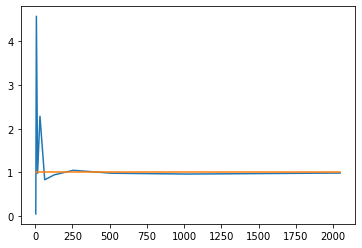

In [33]:
n = 2
estimatedValues = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nValues = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
trueValues = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
for i in range(10):
    gaussian = np.random.multivariate_normal(mean, cov, n)
    n *= 2
    covMatrix = np.cov(np.transpose(gaussian))
    estimatedValues[i] = covMatrix[0][0]
    nValues[i] = n
    
print(estimatedValues)

plt.plot(nValues, estimatedValues)
plt.plot(nValues, trueValues)

As you can see, the estimated covariance converges to the true covariance as the number of samples increases. 

<h1>Problem 2</h1>

      Unnamed: 0         0         1
0              0  1.038502  0.835053
1              1  0.320455  0.149079
2              2  0.055480  0.271672
3              3 -0.007260 -0.126550
4              4 -1.237390 -1.049932
...          ...       ...       ...
9995        9995 -0.632309 -0.797517
9996        9996  0.679417  0.526470
9997        9997  0.890697  1.072751
9998        9998  0.475293  0.536909
9999        9999  1.207406  1.230797

[10000 rows x 3 columns]


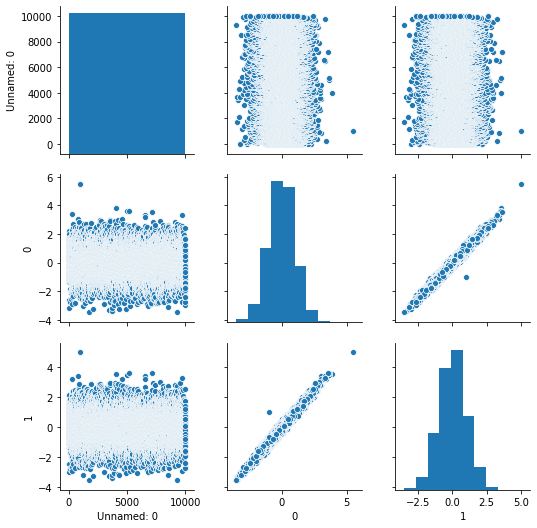

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('Lab2_Data/DF2')

print(data)
sns.pairplot(data)

For this question we must figure out which outlier is 'more-outlying.' The way we are going to do this is by a transformation. By what exact transformation though? Well we need to know a bit about our features first
1. Feature 0
    - Standard (0 mean, 1 var) Gaussian-like distribution with a near perfect covariance with feature 1\n
2. Feature 1
    - Standard (0 mean, 1 var) Gaussian-like distribution with a near perfect covariance with feature 0\n


## Finding the Transformation Matrix

Let us assume that our random variable $z$ is a gaussian, sampled form our data. After observation of $z$ we can say that there is some transformation, $Q$, on a standard gaussian, $y$, such that $z = Qy$. Perhaps we would like to know what the trasnformation was. 

$$cov(z) = zz^T$$
$$cov(z) = (Qy)(Qy)^T$$
$$cov(z) = E_y[(Qy)(Qy)^T]$$
$$cov(z) = Q E_y[yy^T] Q^T$$
$$cov(z) = QIQ^T$$

Now that we have found out a way to get Q, we must figure out what transformation to apply to our gaussian $z$ to return it to a standard gaussian. This will allow us to see how much the outliers truly deviate. 

$$w = AQy$$
$$cov(w) = E_y[AQyy^TQ^TA^T] = I$$
$$ AQE_y[yy^T]Q^TA^T = I$$
$$ AQQ^TA^T = I $$
Here we need to use some linear algebra...
$$ QQ^T = cov(z) = M, AA^T = N$$
$$ MN = I $$
$$ N = M^-1 $$ 
$$ A^T = cholesky(N) $$

We have now found our transformation matrix A...Once applied to our original data, we should see how one outlier is worse than the other.

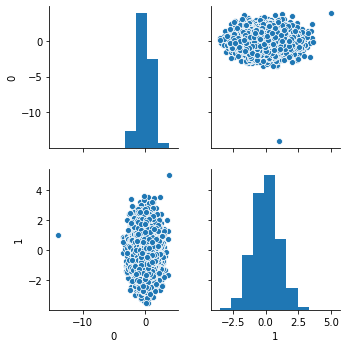

In [36]:
from scipy import linalg
from numpy.linalg import inv

z = data[['0','1']]
cov_z = np.cov(np.transpose(z))

inv_cov_z = inv(cov_z)
I = np.matmul(inv_cov_z,cov_z)

A = linalg.cholesky(inv_cov_z)
w = np.matmul(z, np.transpose(A))

sns.pairplot(w)

In [37]:
outlier_1 = np.array([-1,1])
outlier_2 = np.array([5.5,5])

transformed_outlier_1 = np.matmul(outlier_1, np.transpose(A))
transformed_outlier_2 = np.matmul(outlier_2, np.transpose(A))

print(transformed_outlier_1)
print(transformed_outlier_2)

[-13.99392155   0.99792665]
[3.86307199 4.98963323]


<h1>Problem 3</h1>

In [38]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [39]:
def calcStdDev(n):
    mu = 0
    sigma = 1
    b0 = -3
    b = 0
    bHat = []
    sumNums = 0
    
    for i in range(1000):
        x = np.random.normal(mu, sigma, n)
        e = np.random.normal(mu, sigma, n)
        y = b0 + (x * b) + e
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        bHat.append(slope)
    
    for i in range(1000):
         sumNums += np.square(bHat[i] - b)
            
    return (sumNums / np.sqrt(1000))

In [40]:
stdDev = calcStdDev(150)
givenBHat = -0.15
t = abs(givenBHat / stdDev)
print(t)

0.7125339526540194


The t-ratio is any given estimate divided by the standard error. In our case, we calculated the standard error in the stdDev variable and are using the given B-hat value of -0.15. We know that a t-ratio magnitude value greater than 1.96 suggests that our coefficient is statistically significantly different from 0 at the 95% confidence level. 1.645 is used for 90% confidence. Since our value is approximately 0.7 as shown,

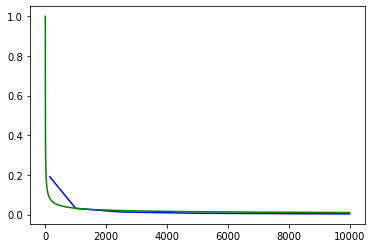

In [41]:
n = [150, 1000, 2500, 5000, 10000]
y = [calcStdDev(n[0]), calcStdDev(n[1]), calcStdDev(n[2]), calcStdDev(n[3]), calcStdDev(n[4])]
x = [x for x in range(1, 10001)]
plt.plot(n, y, "b", x, 1/np.sqrt(x), "g")

By plotting the calculated standard error (blue) for several different values with 1/sqrt(n) (green), we can see that as n increases, the two lines converge.

<h1>Problem 4</h1>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import linregress

In [45]:
# Returns top names of top numNames people from year 
def getTopNames(numNames, year):
    fileName = "Names/yob" + str(year) + ".txt"
    data = pd.read_csv(fileName, names=['Name', 'Sex', 'Frequency'])
    topNames = data.head(numNames)
    return(topNames)

getTopNames(10, 1990)

,Name,Sex,Frequency
0,Jessica,F,46470
1,Ashley,F,45553
2,Brittany,F,36534
3,Amanda,F,34405
4,Samantha,F,25865
5,Sarah,F,25810
6,Stephanie,F,24859
7,Jennifer,F,22219
8,Elizabeth,F,20742
9,Lauren,F,20499


getTopNames() returns the topNames people with the highest frequency of a given year. 

In [46]:
# Create a temporary dataframe that holds frequencies for name we are looking for
# Add dataframe to a list and return the list (holds information for both female and male frequency)
def freqName(name):
    tempList = []
    for i in range(1880, 2016):
        fileName = "Names/yob" + str(i) + ".txt"
        data = pd.read_csv(fileName, names=['Name', 'Sex', 'Frequency'])
        data['Year'] = i                               # Adding year column to make results easier to read
        tempDataframe = data.loc[data['Name'] == name] # Create a dataframe holding rows with a name we are looking for
        tempList.append(tempDataframe)
           
    return tempList

freqName("Bob")

[     Name Sex  Frequency  Year
 1185  Bob   M         46  1880,      Name Sex  Frequency  Year
 1155  Bob   M         50  1881,      Name Sex  Frequency  Year
 1239  Bob   M         59  1882,      Name Sex  Frequency  Year
 1243  Bob   M         62  1883,      Name Sex  Frequency  Year
 1411  Bob   M         50  1884,      Name Sex  Frequency  Year
 1423  Bob   M         52  1885,      Name Sex  Frequency  Year
 1481  Bob   M         66  1886,      Name Sex  Frequency  Year
 1477  Bob   M         74  1887,      Name Sex  Frequency  Year
 1701  Bob   M         59  1888,      Name Sex  Frequency  Year
 1701  Bob   M         52  1889,      Name Sex  Frequency  Year
 1760  Bob   M         53  1890,      Name Sex  Frequency  Year
 1746  Bob   M         55  1891,      Name Sex  Frequency  Year
 1883  Bob   M         61  1892,      Name Sex  Frequency  Year
 1873  Bob   M         59  1893,      Name Sex  Frequency  Year
 1950  Bob   M         48  1894,      Name Sex  Frequency  Year
 2050  B

freqNames() returns a list of frequencies for each year of the indicated name. The list contains frequencies for males and females if a name was used for both sexes.

In [47]:
# Create a temporary dataframe that holds relative frequencies for name we are looking for
# Add dataframe to a list and return the list (holds information for both female and male relative frequency)
def relativeFreqName(name):
    tempList = []
    for i in range(1880, 2016):
        fileName = "Names/yob" + str(i) + ".txt"
        data = pd.read_csv(fileName, names=['Name', 'Sex', 'Frequency'])
        sumPerYear = data['Frequency'].sum()           
        data['Year'] = i                               # Adding year column to make results easier to read
        data['Frequency'] = data['Frequency'].divide(sumPerYear, fill_value=1)
        tempDataframe = data.loc[data['Name'] == name] # Create a dataframe holding rows with a name we are looking for
        tempList.append(tempDataframe)
           
    return tempList

relativeFreqName("Bob")

[     Name Sex  Frequency  Year
 1185  Bob   M   0.000228  1880,      Name Sex  Frequency  Year
 1155  Bob   M   0.000259  1881,      Name Sex  Frequency  Year
 1239  Bob   M   0.000266  1882,      Name Sex  Frequency  Year
 1243  Bob   M   0.000286  1883,      Name Sex  Frequency  Year
 1411  Bob   M   0.000205  1884,      Name Sex  Frequency  Year
 1423  Bob   M   0.000216  1885,      Name Sex  Frequency  Year
 1481  Bob   M   0.000259  1886,      Name Sex  Frequency  Year
 1477  Bob   M   0.000299  1887,      Name Sex  Frequency  Year
 1701  Bob   M   0.000197  1888,      Name Sex  Frequency  Year
 1701  Bob   M    0.00018  1889,      Name Sex  Frequency  Year
 1760  Bob   M   0.000176  1890,      Name Sex  Frequency  Year
 1746  Bob   M   0.000192  1891,      Name Sex  Frequency  Year
 1883  Bob   M   0.000182  1892,      Name Sex  Frequency  Year
 1873  Bob   M   0.000181  1893,      Name Sex  Frequency  Year
 1950  Bob   M   0.000142  1894,      Name Sex  Frequency  Year
 2050  B

relativeFreqNames() returns a list of relative frequencies for each year of the indicated name. The lists contains relative frequencies for males and females if a name was used for both sexes.

In [48]:
males = {}
females = {}
return_names = []

# Iterate through each file and create a temporary dataframe to hold names that are male and female
# Then go through the rows of each dataframe and store the name and relative frequency into males/females dictionaries
for i in range(1880, 2016):    
    fileName = "Names/yob" + str(i) + ".txt"
    data = pd.read_csv(fileName, names=['Name', 'Sex', 'Frequency'])
    temp = data[data.duplicated('Name', keep=False) == True] # Each temporary dataframe holds names that are 
                                                             # both female and male for each year
    
    # For each year calculate the sum and use that sum to calculate relative
    # frequency of each name each year
    sum = temp['Frequency'].sum()
    
    # Iterate through each name and store relative frequency in corresponding 
    # dictionary for each year
    for row in temp.itertuples():
        if(row[2] == 'M'):
            tempDict = {i:row[3] / sum}
            if(row[1] in males):
                males[row[1]].update(tempDict)
            else:
                males[row[1]] = tempDict
        else:
            tempDict = {i:row[3] / sum}
            if(row[1] in females):
                females[row[1]].update(tempDict)
            else:
                females[row[1]] = tempDict
                
# Iterate through males and females, looking for instances when one gender's relative frequency is greater than the other
# but then the other gender overtakes the original popular one 
for key in males:
    first_flag = True
    m_flag = False
    f_flag = False
    for year in males[key]:
        if(first_flag):
            if(males[key][year] >= females[key][year]):
                m_flag = True
                first_flag = False
            else:
                f_flag = True
                first_flag = False
        else:
            if(m_flag):
                if(males[key][year] <= females[key][year]):
                    return_names.append(key)
                    break
            elif(f_flag):
                if(males[key][year] >= females[key][year]):
                    return_names.append(key)
                    break
                    
print(return_names)

['Marion', 'Jessie', 'Sidney', 'Leslie', 'Alva', 'Ollie', 'Allie', 'Lynn', 'Jimmie', 'Dee', 'Merle', 'Dell', 'Fay', 'Tommie', 'Lou', 'Carey', 'Augustine', 'Clair', 'Jean', 'Shirley', 'Freddie', 'Lacy', 'Ossie', 'Theo', 'Bird', 'Alpha', 'Erie', 'Oda', 'Sammie', 'Vernie', 'Artie', 'Augusta', 'Cleo', 'Jewel', 'Johnie', 'Byrd', 'Ocie', 'Guadalupe', 'Lue', 'Odie', 'Lonie', 'Mannie', 'Dana', 'Gene', 'Cary', 'Gail', 'Olie', 'Lennie', 'Claudie', 'Donnie', 'Ottie', 'Verne', 'Elza', 'Arlie', 'Bee', 'Orrie', 'Orie', 'Jodie', 'Tracy', 'Osie', 'Golden', 'Valentine', 'Love', 'Laverne', 'Courtney', 'Rene', 'Rennie', 'Billie', 'Pleasant', 'Sydney', 'Oral', 'Hollie', 'Jule', 'Gay', 'Laurie', 'Montie', 'Patsy', 'Otha', 'Ivory', 'Laurel', 'Alvie', 'Woodie', 'Earlie', 'Lorenza', 'Dennie', 'Maxie', 'Kay', 'Santos', 'Vannie', 'Aubrey', 'Carlie', 'Mell', 'Ernie', 'Garnet', 'Odell', 'Genie', 'Unknown', 'Garnett', 'Pearley', 'Robbie', 'Avery', 'Bernie', 'Shellie', 'Arley', 'Beryl', 'Elvie', 'Linnie', 'Roe', 'W

We iterate through each file and extract the names that are used by both sexes. The names are stored in the male and female dictionaries, as well as their relative frequencies and the year for each relative frequency (example of dictionary - male = {"Name" : {Year : Relative Frequency}}). Then we iterate through the dictionaries and compare the relative frequencies between male and female. If there is a point where one sex's frequency surpasses the other, than we indicate that as a name that has switched popularity between sexes. We add all the names that meet this condition into a list.

<h1>Problem 5</h1>

In [50]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import math
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
sns.set(style='ticks', palette='husl')
%matplotlib inline

In [51]:
kidiq = pd.read_stata('kidiq.dta')
print(kidiq)

     kid_score  mom_hs      mom_iq  mom_work  mom_age
0           65     1.0  121.117529         4       27
1           98     1.0   89.361882         4       25
2           85     1.0  115.443165         4       27
3           83     1.0   99.449639         3       25
4          115     1.0   92.745710         4       27
..         ...     ...         ...       ...      ...
429         94     0.0   84.877412         4       21
430         76     1.0   92.990392         4       23
431         50     0.0   94.859708         2       24
432         88     1.0   96.856624         2       21
433         70     1.0   91.253336         2       25

[434 rows x 5 columns]


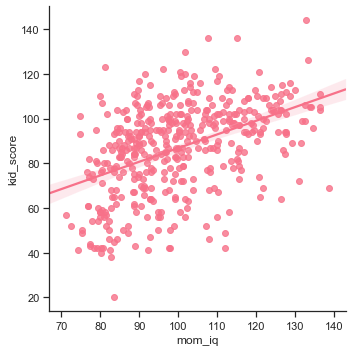

In [52]:
sns.lmplot("mom_iq","kid_score",kidiq)
sns.despine()

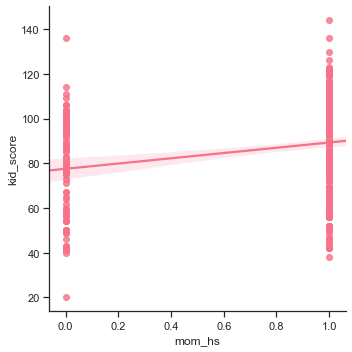

In [53]:
sns.lmplot("mom_hs","kid_score",kidiq)
sns.despine()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


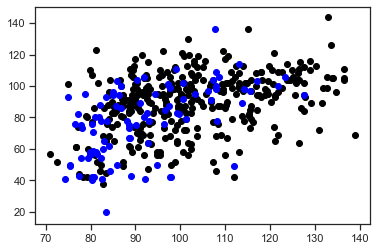

In [54]:
kidiq_nohs = kidiq[kidiq['mom_hs'] == 0]
kidiq_hs = kidiq[kidiq['mom_hs'] == 1]
X_hs = kidiq_hs.as_matrix(["mom_iq"])
Y_hs = kidiq_hs.as_matrix(["kid_score"])
X_nohs = kidiq_nohs.as_matrix(["mom_iq"])
Y_nohs = kidiq_nohs.as_matrix(["kid_score"])

plt.scatter(X_hs, Y_hs,  color='black')
plt.scatter(X_nohs, Y_nohs,  color='blue')

The above graph has given us some insight into how the line of best fit changes when the mother went to highschool/did not go to highschool. It appears the mom's IQ is more important when the mother went to highschool. Let us try and insert an interaction feature to emphasize this relationship in the data.

In [55]:
kidiq = pd.read_stata('kidiq.dta')
kidiq.insert(5, 'InteractiveFeature',0)

for index, row in kidiq.iterrows():  
    kidiq.loc[index,'InteractiveFeature'] = kidiq.loc[index,'mom_hs']*kidiq.loc[index,'mom_iq']
    
print(kidiq)

     kid_score  mom_hs      mom_iq  mom_work  mom_age  InteractiveFeature
0           65     1.0  121.117529         4       27          121.117529
1           98     1.0   89.361882         4       25           89.361882
2           85     1.0  115.443165         4       27          115.443165
3           83     1.0   99.449639         3       25           99.449639
4          115     1.0   92.745710         4       27           92.745710
..         ...     ...         ...       ...      ...                 ...
429         94     0.0   84.877412         4       21            0.000000
430         76     1.0   92.990392         4       23           92.990392
431         50     0.0   94.859708         2       24            0.000000
432         88     1.0   96.856624         2       21           96.856624
433         70     1.0   91.253336         2       25           91.253336

[434 rows x 6 columns]


In [56]:
# Without the interaction feature

kidiq_X_noif = kidiq.as_matrix(["mom_iq","mom_hs"])
kidiq_Y_noif = kidiq.as_matrix(["kid_score"])
lr_noif = linear_model.LinearRegression()
lr_noif.fit(kidiq_X_noif, kidiq_Y_noif)
print(lr_noif.coef_,lr_noif.intercept_)
print(lr_noif.score(kidiq_X_noif,kidiq_Y_noif))

[[0.56390605 5.95011691]] [25.73153818]
0.21414651708983581


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [57]:
# With the interaction feature

kidiq_X_if = kidiq.as_matrix(["mom_iq","mom_hs","InteractiveFeature"])
kidiq_Y_if = kidiq.as_matrix(["kid_score"])
lr_if = linear_model.LinearRegression()
lr_if.fit(kidiq_X_if,kidiq_Y_if)
print(lr_if.coef_,lr_if.intercept_)
print(lr_if.score(kidiq_X_if,kidiq_Y_if))

[[ 0.96888921 51.26822343 -0.48427467]] [-11.48202114]
0.23010362792143813


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


As we can see, when we include the interaction feature into the linear regession, our $R^2$ value increases. This tells us that our model is a bit more accurate. Also, it seems like all of are coefficients/intercept have changed. Let's investigate how this interaction feature has affected the linear regression model.

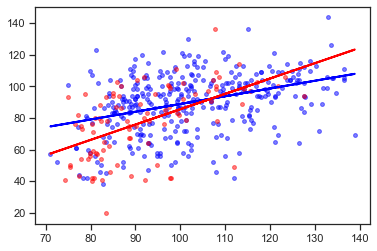

In [59]:
plt.scatter(X_hs, Y_hs, color='blue',alpha=.5, s=15)
plt.plot(X_hs, (.97-.48)*X_hs +51.3 - 11.48, linewidth=2, color='blue')
plt.scatter(X_nohs, Y_nohs, color='red', alpha=.5, s=15)
plt.plot(X_hs, (.97)*X_hs - 11.48, linewidth=2, color='red')

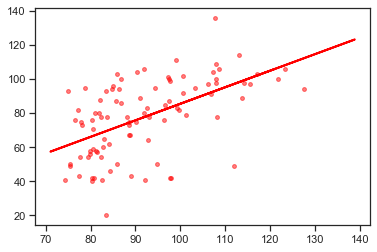

In [60]:
plt.scatter(X_nohs, Y_nohs, color='red', alpha=.5, s=15)
plt.plot(X_hs, (.97)*X_hs - 11.48, linewidth=2, color='red')

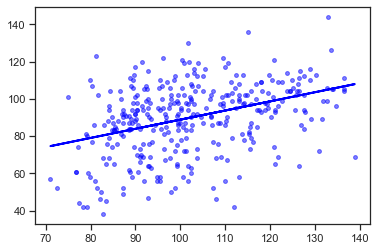

In [61]:
plt.scatter(X_hs, Y_hs, color='blue',alpha=.5, s=15)
plt.plot(X_hs, (.97-.48)*X_hs +51.3 - 11.48, linewidth=2, color='blue')

Further, this was better than our original line of best fit without the interaction feature because that one had the same slope for both conditions of mom_hs. By analyzing the data we saw there was actually a better line fit possible. Through the new feature, we could change the weight of mom_iq (our coefficient on int. feat. was negative) based on mom_hs. Therefore, the introduction of this interaction term decreases our model's training error.